# Library yang dibutuhkan

In [489]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd

# Reading and Understanding Data

In [490]:
df = pd.read_csv('Data_Negara_HELP.csv')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [491]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
Negara              167 non-null object
Kematian_anak       167 non-null float64
Ekspor              167 non-null float64
Kesehatan           167 non-null float64
Impor               167 non-null float64
Pendapatan          167 non-null int64
Inflasi             167 non-null float64
Harapan_hidup       167 non-null float64
Jumlah_fertiliti    167 non-null float64
GDPperkapita        167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [493]:
#ubah tipe data pendapatan ke float
df.Pendapatan = df.Pendapatan.astype(float)

In [494]:
df.GDPperkapita = df.GDPperkapita.astype(float)

In [495]:
#Negara dengan Kematian anak terbanyak
df[df.Kematian_anak.values == df.Kematian_anak.values.max()]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
66,Haiti,208.0,15.3,6.91,64.7,1500.0,5.45,32.1,3.33,662.0


In [496]:
df[df.Pendapatan.values == df.Pendapatan.values.max()]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
123,Qatar,9.0,62.3,1.81,23.8,125000.0,6.98,79.5,2.07,70300.0


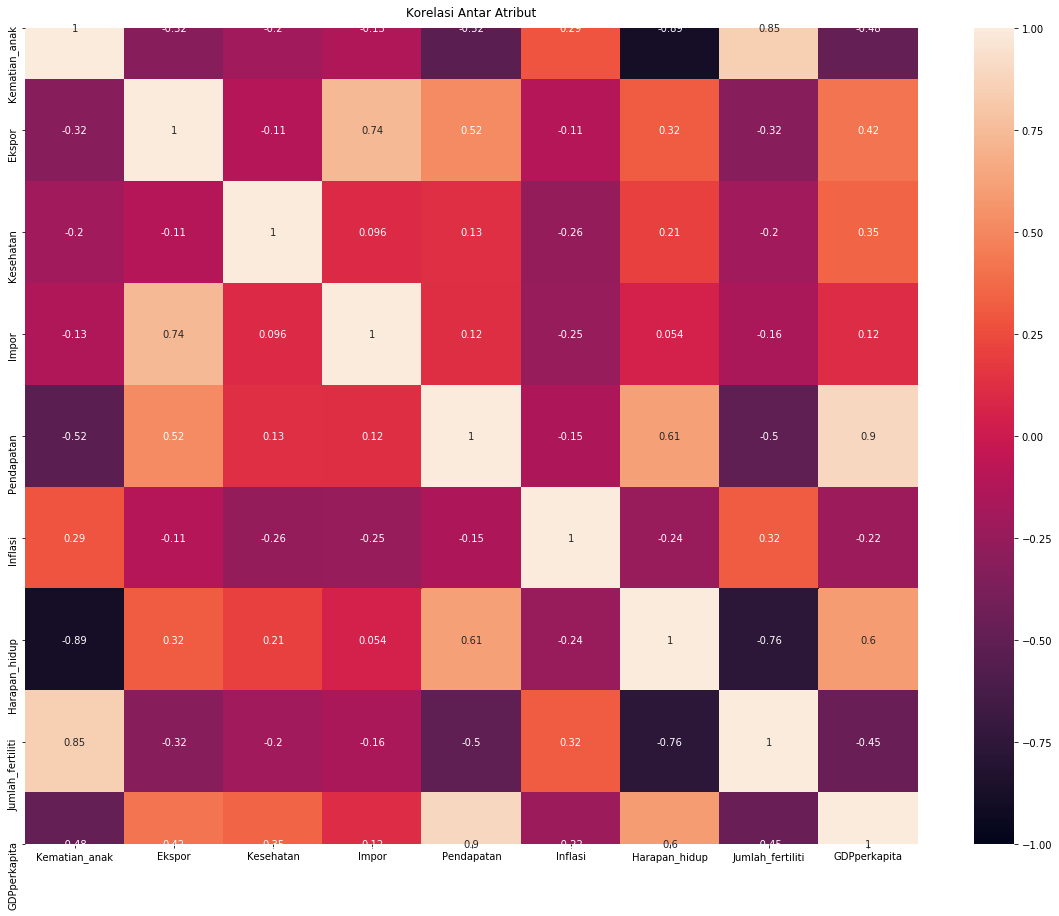

In [497]:
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(df.corr(), vmin=-1 , vmax=1, annot=True)
ax.set_title('Korelasi Antar Atribut',fontdict={'fontsize':12},pad=12)
plt.show()

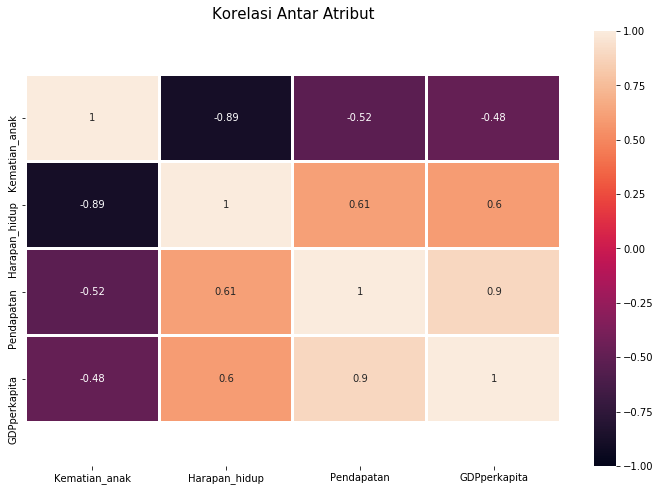

In [498]:
fig2, ax2 = plt.subplots(figsize=(12,8))
sns.heatmap(df[['Kematian_anak','Harapan_hidup','Pendapatan','GDPperkapita']].corr(), vmin=-1 , vmax=1, annot=True,linewidths=2)
ax2.set_title('Korelasi Antar Atribut',fontdict={'fontsize':15},pad=12)
ax2.set_ylim(5-0.5, -0.5)
plt.show()

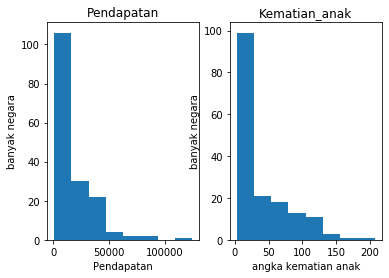

In [499]:
fig10, ax10 = plt.subplots(1,2)
ax10[0].hist(df['Pendapatan'],bins=8)
ax10[0].set_title('Pendapatan')
ax10[0].set_xlabel('Pendapatan')
ax10[0].set_ylabel('banyak negara')
ax10[1].hist(df['Kematian_anak'],bins=8)
ax10[1].set_title('Kematian_anak')
ax10[1].set_xlabel('angka kematian anak')
ax10[1].set_ylabel('banyak negara')
plt.show()


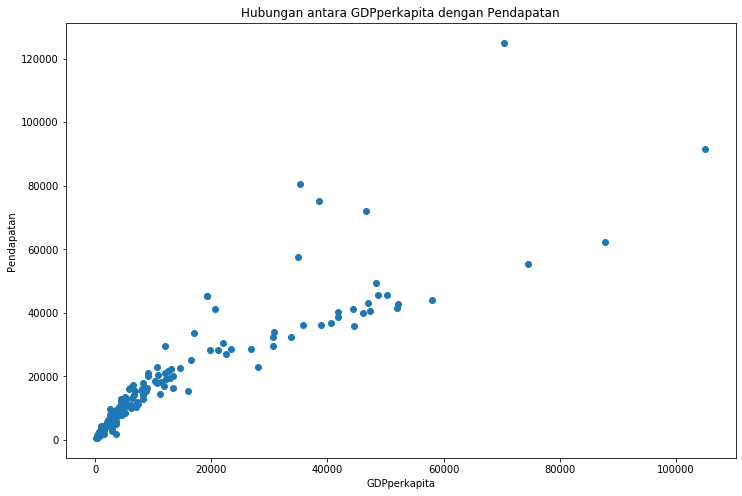

In [500]:
fig20, ax20 = plt.subplots(figsize=(12,8))
ax20.scatter(df['GDPperkapita'],df['Pendapatan'])
ax20.set_xlabel('GDPperkapita')
ax20.set_ylabel('Pendapatan')
ax20.set_title('Hubungan antara GDPperkapita dengan Pendapatan')
plt.show()

# Data Exploration and Cleansing

In [501]:
#saya ambil 2 atribut yang memiliki nilai korelasi terbesar

data_model = df[['Negara','Pendapatan','GDPperkapita','Harapan_hidup','Kematian_anak']]
data_model

,Negara,Pendapatan,GDPperkapita,Harapan_hidup,Kematian_anak
0,Afghanistan,1610.0,553.0,56.2,90.2
1,Albania,9930.0,4090.0,76.3,16.6
2,Algeria,12900.0,4460.0,76.5,27.3
3,Angola,5900.0,3530.0,60.1,119.0
4,Antigua and Barbuda,19100.0,12200.0,76.8,10.3
...,...,...,...,...,...
162,Vanuatu,2950.0,2970.0,63.0,29.2
163,Venezuela,16500.0,13500.0,75.4,17.1
164,Vietnam,4490.0,1310.0,73.1,23.3
165,Yemen,4480.0,1310.0,67.5,56.3


In [502]:
#cek apakah ada nilai missing berupa string

print(data_model.Negara.unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Kuwait' 'Kyrgyz Republic' 'Lao' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 '

In [503]:
print(data_model.Pendapatan.unique())


[  1610.   9930.  12900.   5900.  19100.  18700.   6700.  41400.  43200.
  16000.  22900.  41100.   2440.  15300.  16200.   7880.   1820.   6420.
   5410.   9720.  13300.  14500.  80600.   1430.    764.   2520.   2660.
  40700.   5830.    888.   1930.  19400.   9530.  10900.   1410.    609.
   5190.  13000.   2690.  20100.  33900.  28300.  44000.  11100.   9350.
   9860.   7300.  33700.   1420.  22700.   7350.  39800.  36900.  15400.
   1660.   6730.  40400.   3060.  28700.  11200.   6710.   1190.   1390.
   5840.   1500.  22300.  38800.   4410.   8430.  17400.  12700.  45700.
  29600.  36200.   8000.  35800.   9470.   2480.   1730.  75200.   2790.
   3980.  18300.  16300.   2380.    700.  21100.  91700.  11400.   1030.
  10500.   1870.   3320.  15900.   3340.   3910.   7710.  14000.   6440.
    918.   3720.   8460.   1990.  45500.  32300.    814.   5150.  62300.
  45300.   4280.   7290.   9960.   5600.  21800.  27200. 125000.  17800.
  23100.   1350.   5400.  45400.   2180.  20400.   

In [504]:
print(data_model.GDPperkapita.unique())

[   553.   4090.   4460.   3530.  12200.  10300.   3220.  51900.  46900.
   5840.  28000.  20700.    758.  16000.   6030.  44400.   4340.   2180.
   1980.   4610.   6350.  11200.  35300.   6840.    575.    231.    786.
   1310.  47400.   3310.    446.    897.  12900.   4560.   6250.    769.
    334.   2740.   8200.   1220.  13500.  30800.  19800.  58000.   5450.
   4660.   2600.   2990.  17100.    482.  14600.   3650.  46200.  40600.
   8750.    562.   2960.  41800.  26900.   7370.   2830.    648.    547.
   3040.    662.  13100.  41900.   1350.   3110.   6530.   4500.  48700.
  30600.  35800.   4680.  44500.   3680.   9070.    967.   1490.  38500.
    880.   1140.  11300.   8860.   1170.    327.  12100.  12000. 105000.
   4540.    413.    459.   7100.    708.  21100.   1200.   8000.   2860.
   1630.   2650.   6680.    419.    988.   5190.    592.  50300.  33700.
    348.   2330.  87800.  19300.   1040.   8080.   3230.   5020.   2130.
  12600.  22500.  70300.   8230.  10700.    563.   

In [505]:
print(data_model.Pendapatan.unique())

[  1610.   9930.  12900.   5900.  19100.  18700.   6700.  41400.  43200.
  16000.  22900.  41100.   2440.  15300.  16200.   7880.   1820.   6420.
   5410.   9720.  13300.  14500.  80600.   1430.    764.   2520.   2660.
  40700.   5830.    888.   1930.  19400.   9530.  10900.   1410.    609.
   5190.  13000.   2690.  20100.  33900.  28300.  44000.  11100.   9350.
   9860.   7300.  33700.   1420.  22700.   7350.  39800.  36900.  15400.
   1660.   6730.  40400.   3060.  28700.  11200.   6710.   1190.   1390.
   5840.   1500.  22300.  38800.   4410.   8430.  17400.  12700.  45700.
  29600.  36200.   8000.  35800.   9470.   2480.   1730.  75200.   2790.
   3980.  18300.  16300.   2380.    700.  21100.  91700.  11400.   1030.
  10500.   1870.   3320.  15900.   3340.   3910.   7710.  14000.   6440.
    918.   3720.   8460.   1990.  45500.  32300.    814.   5150.  62300.
  45300.   4280.   7290.   9960.   5600.  21800.  27200. 125000.  17800.
  23100.   1350.   5400.  45400.   2180.  20400.   

In [506]:
print(data_model.Harapan_hidup.unique())

[56.2 76.3 76.5 60.1 76.8 75.8 73.3 82.  80.5 69.1 73.8 76.  70.4 76.7
 80.  71.4 61.8 72.1 71.6 57.1 74.2 77.1 73.9 57.9 57.7 66.1 57.3 81.3
 72.5 47.5 56.5 79.1 74.6 76.4 65.9 57.5 60.4 80.4 56.3 79.9 77.5 79.5
 70.5 74.1 60.9 61.7 65.3 81.4 62.9 65.5 72.8 80.1 62.2 71.3 58.  55.6
 32.1 74.5 66.2 69.9 67.2 81.7 74.7 82.8 68.4 62.8 60.7 78.2 68.5 63.8
 73.1 79.8 46.5 60.8 76.1 73.2 74.  53.1 77.9 59.5 80.3 68.2 73.4 65.4
 69.7 73.5 54.5 66.8 58.6 68.3 80.7 80.9 58.8 60.5 81.  77.8 69.  73.7
 69.2 64.6 71.5 75.1 64.  55.  82.7 75.5 54.3 81.9 74.4 66.3 70.3 81.5
 82.2 69.6 59.3 76.6 71.1 58.7 76.9 67.9 56.8 78.7 68.8 63.  75.4 67.5
 52. ]


In [507]:
#cek missing value dari kedua atribut
data_model.isna().sum()

Negara           0
Pendapatan       0
GDPperkapita     0
Harapan_hidup    0
Kematian_anak    0
dtype: int64

In [508]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
Negara           167 non-null object
Pendapatan       167 non-null float64
GDPperkapita     167 non-null float64
Harapan_hidup    167 non-null float64
Kematian_anak    167 non-null float64
dtypes: float64(4), object(1)
memory usage: 6.6+ KB


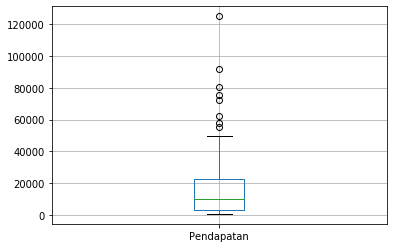

In [509]:
data_model.boxplot(column='Pendapatan')

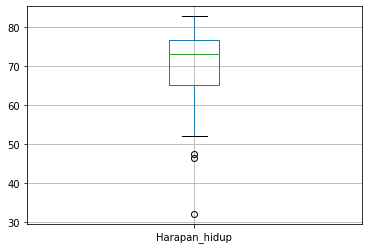

In [510]:
data_model.boxplot(column='Harapan_hidup')

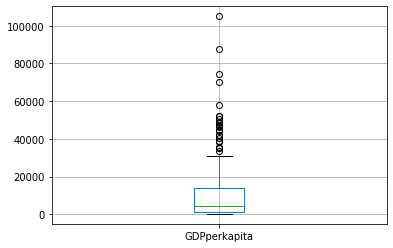

In [511]:
#cek outliers dari kedua atribut
data_model.boxplot(column='GDPperkapita')


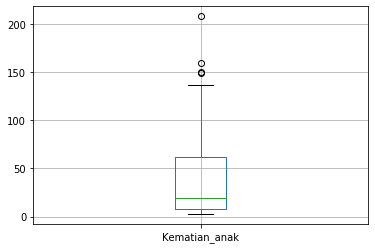

In [512]:
data_model.boxplot(column='Kematian_anak')

In [513]:
#handling outliers

def remove_outliers_iqr(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    Lb = q1 - (iqr * 1.5)
    Ub = q3 + (iqr * 1.5)
    df_final = df[~((df<Lb) | (df>Ub))]
    return df_final


In [514]:
removed_outliers = data_model
removed_outliers['Pendapatan'] = remove_outliers_iqr(data_model['Pendapatan'])
removed_outliers['GDPperkapita'] = remove_outliers_iqr(data_model['GDPperkapita'])
removed_outliers['Harapan_hidup'] = remove_outliers_iqr(data_model['Harapan_hidup'])
removed_outliers['Kematian_anak'] = remove_outliers_iqr(data_model['Kematian_anak'])
removed_outliers

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,Negara,Pendapatan,GDPperkapita,Harapan_hidup,Kematian_anak
0,Afghanistan,1610.0,553.0,56.2,90.2
1,Albania,9930.0,4090.0,76.3,16.6
2,Algeria,12900.0,4460.0,76.5,27.3
3,Angola,5900.0,3530.0,60.1,119.0
4,Antigua and Barbuda,19100.0,12200.0,76.8,10.3
...,...,...,...,...,...
162,Vanuatu,2950.0,2970.0,63.0,29.2
163,Venezuela,16500.0,13500.0,75.4,17.1
164,Vietnam,4490.0,1310.0,73.1,23.3
165,Yemen,4480.0,1310.0,67.5,56.3


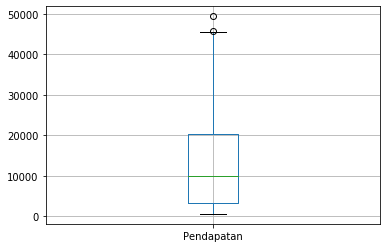

In [515]:
removed_outliers.boxplot(column='Pendapatan')

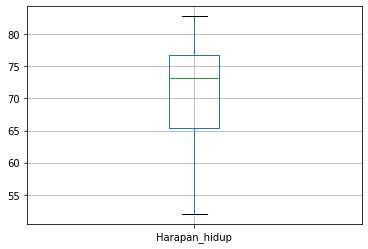

In [516]:
removed_outliers.boxplot(column='Harapan_hidup')

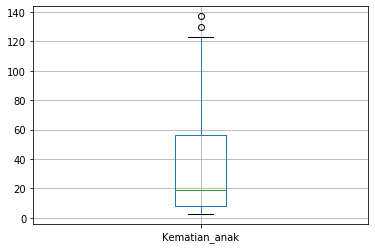

In [517]:
removed_outliers.boxplot(column='Kematian_anak')

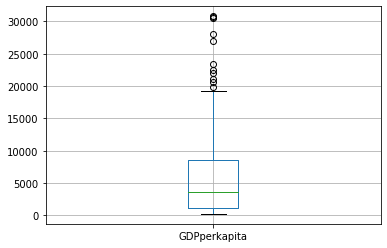

In [518]:
removed_outliers.boxplot(column='GDPperkapita')

In [519]:
removed_outliers.isna().sum()

Negara            0
Pendapatan        8
GDPperkapita     25
Harapan_hidup     3
Kematian_anak     4
dtype: int64

In [520]:
removed_outliers.dropna(inplace=True)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [521]:
removed_outliers.isna().sum()

Negara           0
Pendapatan       0
GDPperkapita     0
Harapan_hidup    0
Kematian_anak    0
dtype: int64

In [522]:
removed_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 166
Data columns (total 5 columns):
Negara           137 non-null object
Pendapatan       137 non-null float64
GDPperkapita     137 non-null float64
Harapan_hidup    137 non-null float64
Kematian_anak    137 non-null float64
dtypes: float64(4), object(1)
memory usage: 6.4+ KB


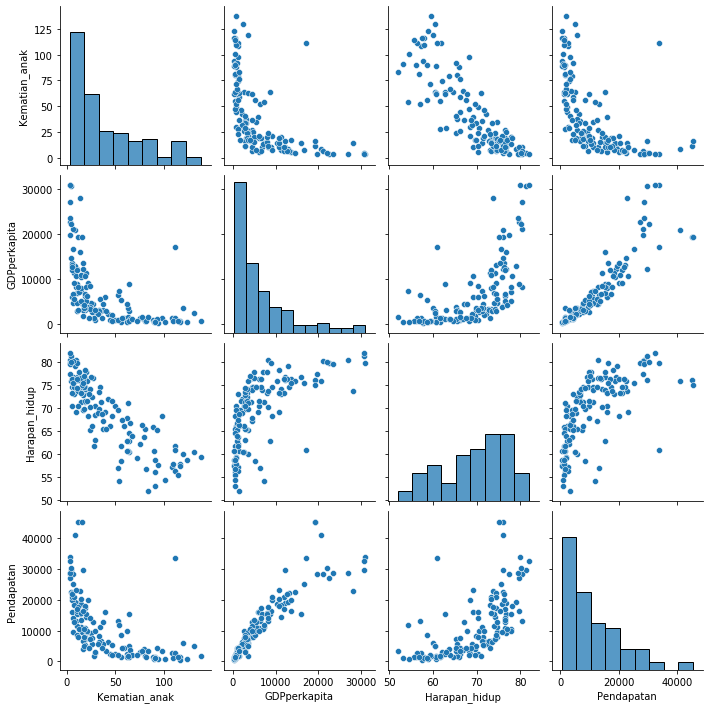

In [523]:
sns.pairplot(vars=['Kematian_anak','GDPperkapita','Harapan_hidup','Pendapatan'],data=removed_outliers)
plt.show()

In [524]:
removed_outliers

,Negara,Pendapatan,GDPperkapita,Harapan_hidup,Kematian_anak
0,Afghanistan,1610.0,553.0,56.2,90.2
1,Albania,9930.0,4090.0,76.3,16.6
2,Algeria,12900.0,4460.0,76.5,27.3
3,Angola,5900.0,3530.0,60.1,119.0
4,Antigua and Barbuda,19100.0,12200.0,76.8,10.3
...,...,...,...,...,...
162,Vanuatu,2950.0,2970.0,63.0,29.2
163,Venezuela,16500.0,13500.0,75.4,17.1
164,Vietnam,4490.0,1310.0,73.1,23.3
165,Yemen,4480.0,1310.0,67.5,56.3


In [525]:
#scalling semua atribut

def normalize(x):
    return (x - x.min())/(x.max() - x.min())

removed_outliers['Pendapatan'] = removed_outliers[['Pendapatan']].apply(normalize)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [526]:
removed_outliers['GDPperkapita'] = removed_outliers[['GDPperkapita']].apply(normalize)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [527]:
removed_outliers['Harapan_hidup'] = removed_outliers[['Harapan_hidup']].apply(normalize)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [528]:
removed_outliers['Kematian_anak'] = removed_outliers[['Kematian_anak']].apply(normalize)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [529]:
removed_outliers

,Negara,Pendapatan,GDPperkapita,Harapan_hidup,Kematian_anak
0,Afghanistan,0.022348,0.010534,0.140468,0.650224
1,Albania,0.208100,0.126239,0.812709,0.100149
2,Algeria,0.274408,0.138343,0.819398,0.180120
3,Angola,0.118126,0.107920,0.270903,0.865471
4,Antigua and Barbuda,0.412828,0.391540,0.829431,0.053064
...,...,...,...,...,...
162,Vanuatu,0.052265,0.089601,0.367893,0.194320
163,Venezuela,0.354781,0.434067,0.782609,0.103886
164,Vietnam,0.086647,0.035297,0.705686,0.150224
165,Yemen,0.086424,0.035297,0.518395,0.396861


In [530]:
#save data menjadi csv yang baru

removed_outliers.to_csv('model.csv',index=False)

# Clustering with K-Means

In [531]:
model = pd.read_csv('model.csv')
model

,Negara,Pendapatan,GDPperkapita,Harapan_hidup,Kematian_anak
0,Afghanistan,0.022348,0.010534,0.140468,0.650224
1,Albania,0.208100,0.126239,0.812709,0.100149
2,Algeria,0.274408,0.138343,0.819398,0.180120
3,Angola,0.118126,0.107920,0.270903,0.865471
4,Antigua and Barbuda,0.412828,0.391540,0.829431,0.053064
...,...,...,...,...,...
132,Vanuatu,0.052265,0.089601,0.367893,0.194320
133,Venezuela,0.354781,0.434067,0.782609,0.103886
134,Vietnam,0.086647,0.035297,0.705686,0.150224
135,Yemen,0.086424,0.035297,0.518395,0.396861


<h3> Clustering Model 1 = Pendapatan dan GDPperkapita <h3>

In [532]:
model_1 = model[['Negara','Pendapatan','GDPperkapita']]
model_1

,Negara,Pendapatan,GDPperkapita
0,Afghanistan,0.022348,0.010534
1,Albania,0.208100,0.126239
2,Algeria,0.274408,0.138343
3,Angola,0.118126,0.107920
4,Antigua and Barbuda,0.412828,0.391540
...,...,...,...
132,Vanuatu,0.052265,0.089601
133,Venezuela,0.354781,0.434067
134,Vietnam,0.086647,0.035297
135,Yemen,0.086424,0.035297


D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


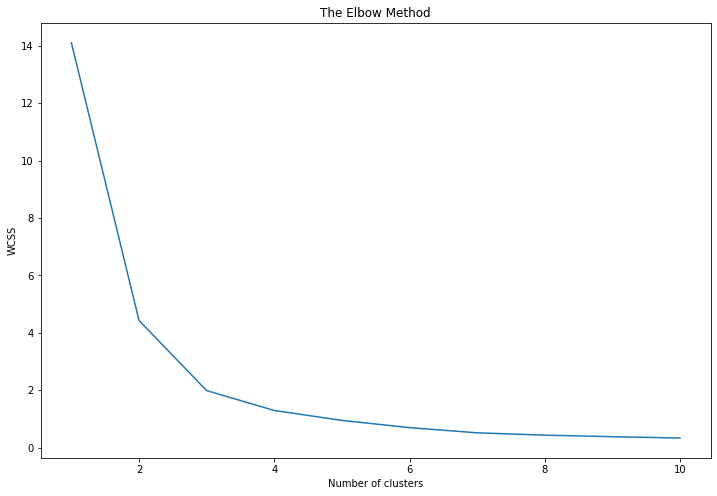

In [533]:
# mencari 'optimal number of cluster' berdasarkan nilai-nilai inersia

wcss1 = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init='k-means++',random_state=42)
    kmeans.fit(model_1[['Pendapatan','GDPperkapita']])
    wcss1.append(kmeans.inertia_)
    
fig3, ax3 = plt.subplots(figsize=(12,8))
ax3.plot(range(1,11),wcss1)
ax3.set_xlabel('Number of clusters')
ax3.set_ylabel('WCSS')
ax3.set_title('The Elbow Method')
plt.show()

In [534]:
#k = 3

kmeans1 = KMeans(n_clusters=3,random_state=42).fit(model_1[['Pendapatan','GDPperkapita']])
labels1 = kmeans1.labels_

In [535]:
df_cluster1 = pd.DataFrame(data=model_1,columns=['Negara','Pendapatan','GDPperkapita'])
df_cluster1['labels_k_3'] = labels1

In [536]:
df_cluster1

,Negara,Pendapatan,GDPperkapita,labels_k_3
0,Afghanistan,0.022348,0.010534,0
1,Albania,0.208100,0.126239,0
2,Algeria,0.274408,0.138343,2
3,Angola,0.118126,0.107920,0
4,Antigua and Barbuda,0.412828,0.391540,2
...,...,...,...,...
132,Vanuatu,0.052265,0.089601,0
133,Venezuela,0.354781,0.434067,2
134,Vietnam,0.086647,0.035297,0
135,Yemen,0.086424,0.035297,0


In [538]:
# k = 4

kmeans2 = KMeans(n_clusters=4,random_state=42).fit(model_1[['Pendapatan','GDPperkapita']])
labels2 = kmeans2.labels_

In [539]:
df_cluster1['labels_k_4'] = labels2

In [540]:
df_cluster1

,Negara,Pendapatan,GDPperkapita,labels_k_3,labels_k_4
0,Afghanistan,0.022348,0.010534,0,0
1,Albania,0.208100,0.126239,0,3
2,Algeria,0.274408,0.138343,2,3
3,Angola,0.118126,0.107920,0,0
4,Antigua and Barbuda,0.412828,0.391540,2,1
...,...,...,...,...,...
132,Vanuatu,0.052265,0.089601,0,0
133,Venezuela,0.354781,0.434067,2,1
134,Vietnam,0.086647,0.035297,0,0
135,Yemen,0.086424,0.035297,0,0


In [541]:
#k = 2
kmeans3 = KMeans(n_clusters=2,random_state=42).fit(model_1[['Pendapatan','GDPperkapita']])
labels3 = kmeans3.labels_

In [542]:
df_cluster1['labels_k_2'] = labels3

In [543]:
df_cluster1

,Negara,Pendapatan,GDPperkapita,labels_k_3,labels_k_4,labels_k_2
0,Afghanistan,0.022348,0.010534,0,0,1
1,Albania,0.208100,0.126239,0,3,1
2,Algeria,0.274408,0.138343,2,3,1
3,Angola,0.118126,0.107920,0,0,1
4,Antigua and Barbuda,0.412828,0.391540,2,1,0
...,...,...,...,...,...,...
132,Vanuatu,0.052265,0.089601,0,0,1
133,Venezuela,0.354781,0.434067,2,1,0
134,Vietnam,0.086647,0.035297,0,0,1
135,Yemen,0.086424,0.035297,0,0,1


In [545]:
from sklearn.metrics import silhouette_score

print('k = 3 :',silhouette_score(df_cluster1[['Pendapatan','GDPperkapita']],labels=labels1))
print('k = 4 :',silhouette_score(df_cluster1[['Pendapatan','GDPperkapita']],labels=labels2))
print('k = 2 :',silhouette_score(df_cluster1[['Pendapatan','GDPperkapita']],labels=labels3))


k = 3 : 0.6075219428935511
k = 4 : 0.5590175407269052
k = 2 : 0.6495512453720615


In [546]:
df_cluster1 = df_cluster1.drop(columns=['labels_k_3','labels_k_4'])

In [547]:
df_cluster1

,Negara,Pendapatan,GDPperkapita,labels_k_2
0,Afghanistan,0.022348,0.010534,1
1,Albania,0.208100,0.126239,1
2,Algeria,0.274408,0.138343,1
3,Angola,0.118126,0.107920,1
4,Antigua and Barbuda,0.412828,0.391540,0
...,...,...,...,...
132,Vanuatu,0.052265,0.089601,1
133,Venezuela,0.354781,0.434067,0
134,Vietnam,0.086647,0.035297,1
135,Yemen,0.086424,0.035297,1


n_cluster = 2


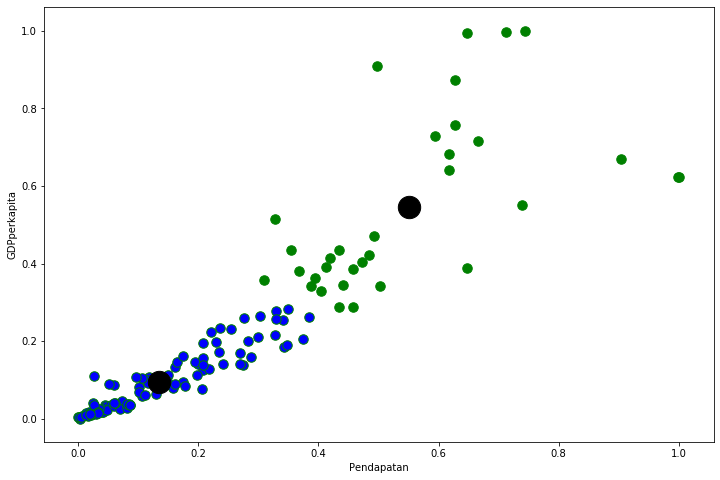

In [550]:
#visualisasi data hasil cluster dengan number of clusters = 3

print('n_cluster = 2')
fig4, ax4 = plt.subplots(figsize=(12,8))
ax4.scatter(df_cluster1['Pendapatan'][df_cluster1.labels_k_2 == 0],
            df_cluster1['GDPperkapita'][df_cluster1.labels_k_2 == 0],
            c='green',s=90,edgecolor='green')
ax4.scatter(df_cluster1['Pendapatan'][df_cluster1.labels_k_2 == 1],
            df_cluster1['GDPperkapita'][df_cluster1.labels_k_2 == 1],
            c='blue',s=90,edgecolor='green')


ax4.set_xlabel('Pendapatan')
ax4.set_ylabel('GDPperkapita')

centers = kmeans3.cluster_centers_
ax4.scatter(centers[:,0],centers[:,1],c='black',s=500)
plt.show()

<h3> clustering 2 = Kematian_anak dan Harapan_hidup <h3> 

In [551]:
model_2 = model[['Negara','Kematian_anak','Harapan_hidup']]
model_2

,Negara,Kematian_anak,Harapan_hidup
0,Afghanistan,0.650224,0.140468
1,Albania,0.100149,0.812709
2,Algeria,0.180120,0.819398
3,Angola,0.865471,0.270903
4,Antigua and Barbuda,0.053064,0.829431
...,...,...,...
132,Vanuatu,0.194320,0.367893
133,Venezuela,0.103886,0.782609
134,Vietnam,0.150224,0.705686
135,Yemen,0.396861,0.518395


D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


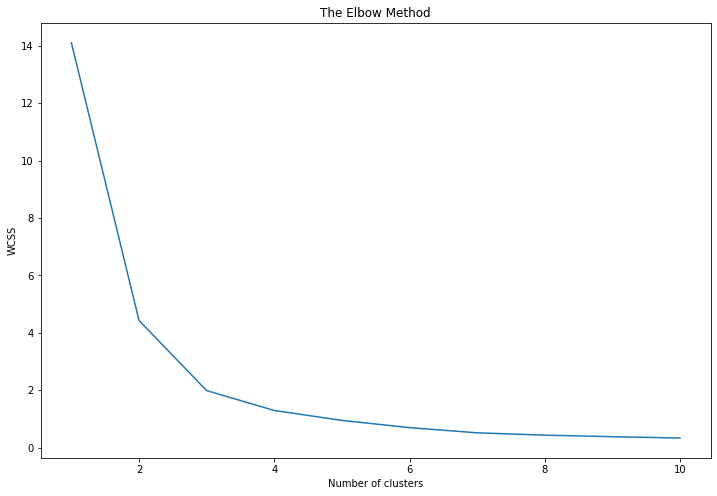

In [552]:
# mencari 'optimal number of cluster' berdasarkan nilai-nilai inersia

wcss2 = []
for i in range(1,11):
    kmeans10 = KMeans(n_clusters = i,init='k-means++',random_state=42)
    kmeans10.fit(model_2[['Kematian_anak','Harapan_hidup']])
    wcss2.append(kmeans10.inertia_)
    
fig5, ax5 = plt.subplots(figsize=(12,8))
ax5.plot(range(1,11),wcss1)
ax5.set_xlabel('Number of clusters')
ax5.set_ylabel('WCSS')
ax5.set_title('The Elbow Method')
plt.show()

In [553]:
kmeans1_model2 = KMeans(n_clusters=2,random_state=42).fit(model_2[['Kematian_anak','Harapan_hidup']])
labels1_model2 = kmeans1_model2.labels_


In [554]:
df_cluster2 = pd.DataFrame(data=model_2,columns=['Negara','Kematian_anak','Harapan_hidup'])
df_cluster2['labels_k_2'] = labels1_model2

In [555]:
df_cluster2

,Negara,Kematian_anak,Harapan_hidup,labels_k_2
0,Afghanistan,0.650224,0.140468,1
1,Albania,0.100149,0.812709,0
2,Algeria,0.180120,0.819398,0
3,Angola,0.865471,0.270903,1
4,Antigua and Barbuda,0.053064,0.829431,0
...,...,...,...,...
132,Vanuatu,0.194320,0.367893,0
133,Venezuela,0.103886,0.782609,0
134,Vietnam,0.150224,0.705686,0
135,Yemen,0.396861,0.518395,1


In [556]:
kmeans2_model2 = KMeans(n_clusters=3,random_state=42).fit(model_2[['Kematian_anak','Harapan_hidup']])
labels2_model2 = kmeans2_model2.labels_

In [557]:
df_cluster2['labels_k_3'] = labels2_model2

In [558]:
df_cluster2

,Negara,Kematian_anak,Harapan_hidup,labels_k_2,labels_k_3
0,Afghanistan,0.650224,0.140468,1,0
1,Albania,0.100149,0.812709,0,1
2,Algeria,0.180120,0.819398,0,1
3,Angola,0.865471,0.270903,1,0
4,Antigua and Barbuda,0.053064,0.829431,0,1
...,...,...,...,...,...
132,Vanuatu,0.194320,0.367893,0,2
133,Venezuela,0.103886,0.782609,0,1
134,Vietnam,0.150224,0.705686,0,1
135,Yemen,0.396861,0.518395,1,2


In [559]:
kmeans3_model2 = KMeans(n_clusters=4,random_state=42).fit(model_2[['Kematian_anak','Harapan_hidup']])
labels3_model2 = kmeans3_model2.labels_

In [560]:
df_cluster2['labels_k_4'] = labels3_model2

In [561]:
df_cluster2

,Negara,Kematian_anak,Harapan_hidup,labels_k_2,labels_k_3,labels_k_4
0,Afghanistan,0.650224,0.140468,1,0,3
1,Albania,0.100149,0.812709,0,1,2
2,Algeria,0.180120,0.819398,0,1,2
3,Angola,0.865471,0.270903,1,0,3
4,Antigua and Barbuda,0.053064,0.829431,0,1,2
...,...,...,...,...,...,...
132,Vanuatu,0.194320,0.367893,0,2,0
133,Venezuela,0.103886,0.782609,0,1,2
134,Vietnam,0.150224,0.705686,0,1,2
135,Yemen,0.396861,0.518395,1,2,1


In [562]:
print('k = 2 :',silhouette_score(df_cluster2[['Kematian_anak','Harapan_hidup']],labels=labels1_model2))
print('k = 3 :',silhouette_score(df_cluster2[['Kematian_anak','Harapan_hidup']],labels=labels2_model2))
print('k = 4 :',silhouette_score(df_cluster2[['Kematian_anak','Harapan_hidup']],labels=labels3_model2))


k = 2 : 0.630278143220795
k = 3 : 0.5363900178715018
k = 4 : 0.4767289770845623


In [563]:
df_cluster2 = df_cluster2.drop(columns=['labels_k_3','labels_k_4'])
df_cluster2

,Negara,Kematian_anak,Harapan_hidup,labels_k_2
0,Afghanistan,0.650224,0.140468,1
1,Albania,0.100149,0.812709,0
2,Algeria,0.180120,0.819398,0
3,Angola,0.865471,0.270903,1
4,Antigua and Barbuda,0.053064,0.829431,0
...,...,...,...,...
132,Vanuatu,0.194320,0.367893,0
133,Venezuela,0.103886,0.782609,0
134,Vietnam,0.150224,0.705686,0
135,Yemen,0.396861,0.518395,1


n_cluster = 2


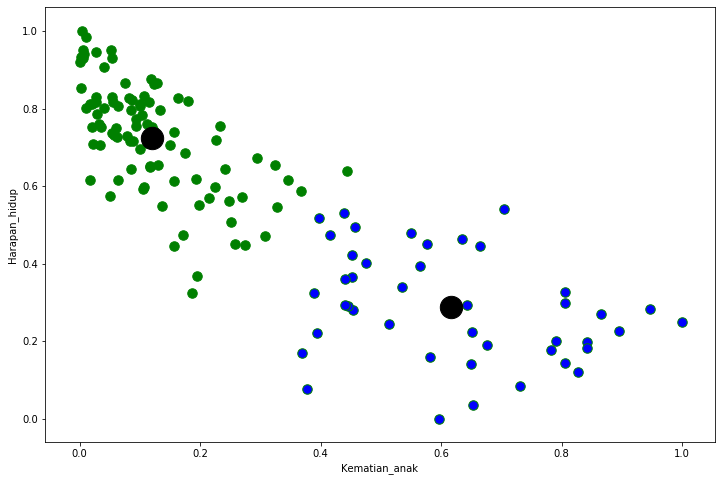

In [564]:
#visualisasi data hasil cluster dengan number of clusters = 3

print('n_cluster = 2')
fig6, ax6 = plt.subplots(figsize=(12,8))
ax6.scatter(df_cluster2['Kematian_anak'][df_cluster2.labels_k_2 == 0],
            df_cluster2['Harapan_hidup'][df_cluster2.labels_k_2 == 0],
            c='green',s=90,edgecolor='green')
ax6.scatter(df_cluster2['Kematian_anak'][df_cluster2.labels_k_2 == 1],
            df_cluster2['Harapan_hidup'][df_cluster2.labels_k_2 == 1],
            c='blue',s=90,edgecolor='green')


ax6.set_xlabel('Kematian_anak')
ax6.set_ylabel('Harapan_hidup')

centers2 = kmeans1_model2.cluster_centers_
ax6.scatter(centers2[:,0],centers2[:,1],c='black',s=500)
plt.show()

In [581]:
#ambil yg cluster nya 0

df_cluster1

,Negara,Pendapatan,GDPperkapita,labels_k_2
0,Afghanistan,0.022348,0.010534,1
1,Albania,0.208100,0.126239,1
2,Algeria,0.274408,0.138343,1
3,Angola,0.118126,0.107920,1
4,Antigua and Barbuda,0.412828,0.391540,0
...,...,...,...,...
132,Vanuatu,0.052265,0.089601,1
133,Venezuela,0.354781,0.434067,0
134,Vietnam,0.086647,0.035297,1
135,Yemen,0.086424,0.035297,1


In [582]:
df_hasil1 = df_cluster1[df_cluster1['labels_k_2'].values == 1]
df_hasil1

,Negara,Pendapatan,GDPperkapita,labels_k_2
0,Afghanistan,0.022348,0.010534,1
1,Albania,0.208100,0.126239,1
2,Algeria,0.274408,0.138343,1
3,Angola,0.118126,0.107920,1
6,Armenia,0.135987,0.097779,1
...,...,...,...,...
131,Uzbekistan,0.081065,0.037587,1
132,Vanuatu,0.052265,0.089601,1
134,Vietnam,0.086647,0.035297,1
135,Yemen,0.086424,0.035297,1


In [583]:
#ambil yang clusternya 1

df_cluster2

,Negara,Kematian_anak,Harapan_hidup,labels_k_2
0,Afghanistan,0.650224,0.140468,1
1,Albania,0.100149,0.812709,0
2,Algeria,0.180120,0.819398,0
3,Angola,0.865471,0.270903,1
4,Antigua and Barbuda,0.053064,0.829431,0
...,...,...,...,...
132,Vanuatu,0.194320,0.367893,0
133,Venezuela,0.103886,0.782609,0
134,Vietnam,0.150224,0.705686,0
135,Yemen,0.396861,0.518395,1


In [584]:
df_hasil2 = df_cluster2[df_cluster2['labels_k_2'].values == 1]
df_hasil2

,Negara,Kematian_anak,Harapan_hidup,labels_k_2
0,Afghanistan,0.650224,0.140468,1
3,Angola,0.865471,0.270903,1
14,Benin,0.805680,0.327759,1
18,Botswana,0.368460,0.170569,1
21,Burkina Faso,0.843049,0.197324,1
22,Burundi,0.675635,0.190635,1
24,Cameroon,0.783259,0.177258,1
29,Comoros,0.635277,0.464883,1
30,"Congo, Dem. Rep.",0.843049,0.183946,1
31,"Congo, Rep.",0.453662,0.280936,1


In [586]:
hasil_merge = pd.merge(df_hasil1, df_hasil2, on='Negara', how='inner')

In [591]:
hasil_merge

,Negara,Pendapatan,GDPperkapita,labels_k_2_x,Kematian_anak,Harapan_hidup,labels_k_2_y
0,Afghanistan,0.022348,0.010534,1,0.650224,0.140468,1
1,Angola,0.118126,0.107920,1,0.865471,0.270903,1
2,Benin,0.027037,0.017240,1,0.805680,0.327759,1
3,Botswana,0.283338,0.200170,1,0.368460,0.170569,1
4,Burkina Faso,0.018330,0.011253,1,0.843049,0.197324,1
5,Burundi,0.003461,0.000000,1,0.675635,0.190635,1
6,Cameroon,0.045790,0.035297,1,0.783259,0.177258,1
7,Comoros,0.017883,0.017600,1,0.635277,0.464883,1
8,"Congo, Dem. Rep.",0.000000,0.003369,1,0.843049,0.183946,1
9,"Congo, Rep.",0.102275,0.082077,1,0.453662,0.280936,1
